# Loading Packages and Data

In [1]:
#Basic Packages Most Python Data Analysis will Require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#This allows us for our matplotlib plots to show up as cell output.
#(without this the plots we make may show up as windows that popout)
%matplotlib inline
print("Inline Functionality Set")
print('Basic Packages Loaded')

Inline Functionality Set
Basic Packages Loaded


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Common Descriptive Analytics Algorithms we will demonstrate in this class
from sklearn.cluster import KMeans
'Descriptive Analytics Algorithms Loaded'

'Descriptive Analytics Algorithms Loaded'

In [3]:
#Load data
#df=pd.read_csv('tripadvisor_review.csv',sep=',')
#df.head()

df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/tripadvisor_review.csv')

In [4]:
categories=[' Average user feedback on \n art galleries',
' Average user feedback \n on dance clubs',
' Average user feedback on \n juice bars',
' Average user feedback on \n restaurants',
' Average user feedback on \n museums',
' Average user feedback on \n resorts',
' Average user feedback on \n parks/picnic spots',
' Average user feedback on \n beaches',
' Average user feedback on \n theaters',
' Average user feedback on \n religious institutions']

In [5]:
df.columns=['User ID']+categories

# One Dimensional Exploratory Data Analysis on Each Tourism Type

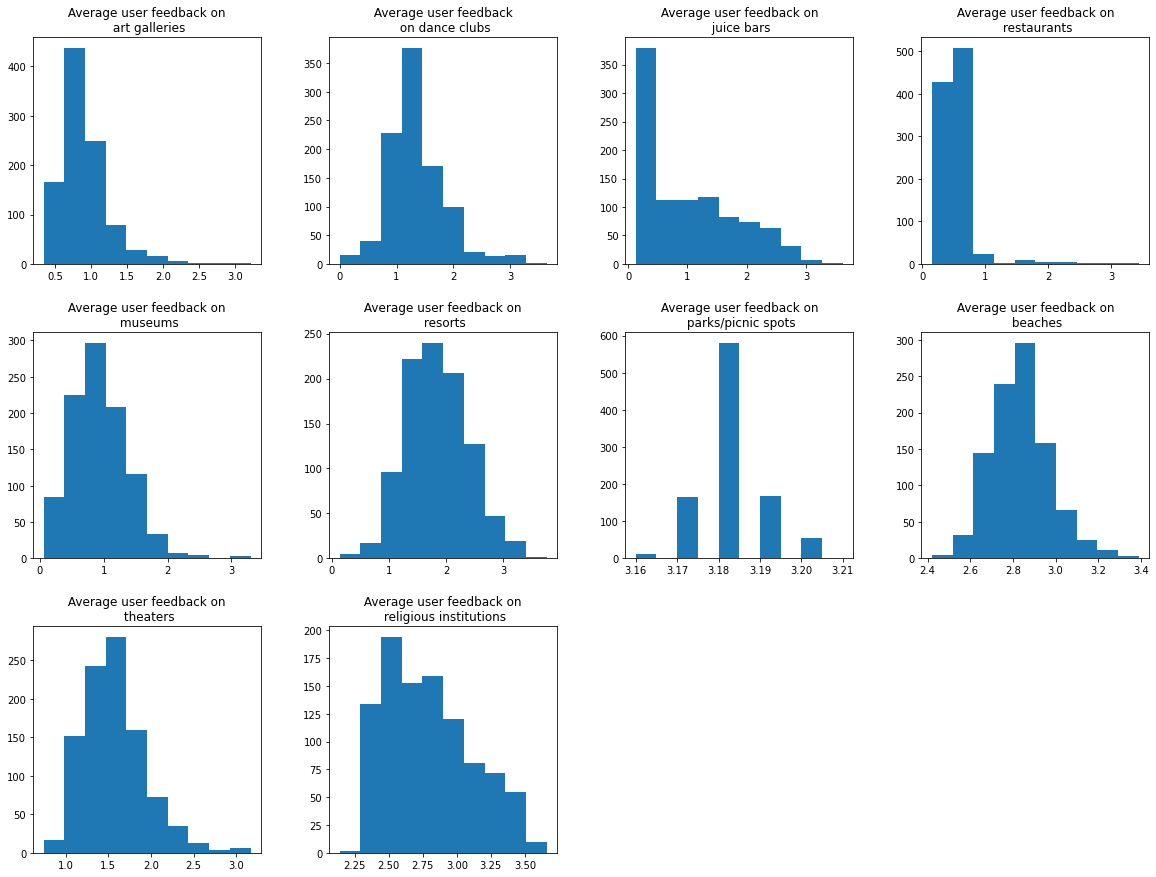

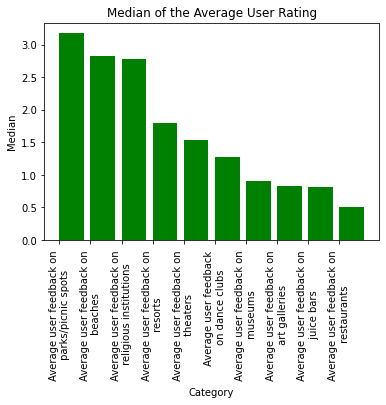

In [6]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 11):
    plt.subplot(3, 4, i)
    plt.hist(df[df.columns[i]])
    plt.title(categories[i-1])
plt.show()
med_list=[]
for i in range(1, 11):
    a=np.median(df[df.columns[i]])
    b=categories[i-1]
    med_list.append([b,a])
df_med=pd.DataFrame(med_list,columns=['Category','Median Average Rating']).\
        sort_values(['Median Average Rating'], ascending=False)
plt.bar(df_med['Category'],df_med['Median Average Rating'], color='green', align="edge")
plt.xticks(rotation=90)
plt.title('Median of the Average User Rating')
plt.ylabel('Median')
plt.xlabel('Category')
plt.show()

# Two Dimensional Exploratory Data Analysis (pairs of Tourism Types)

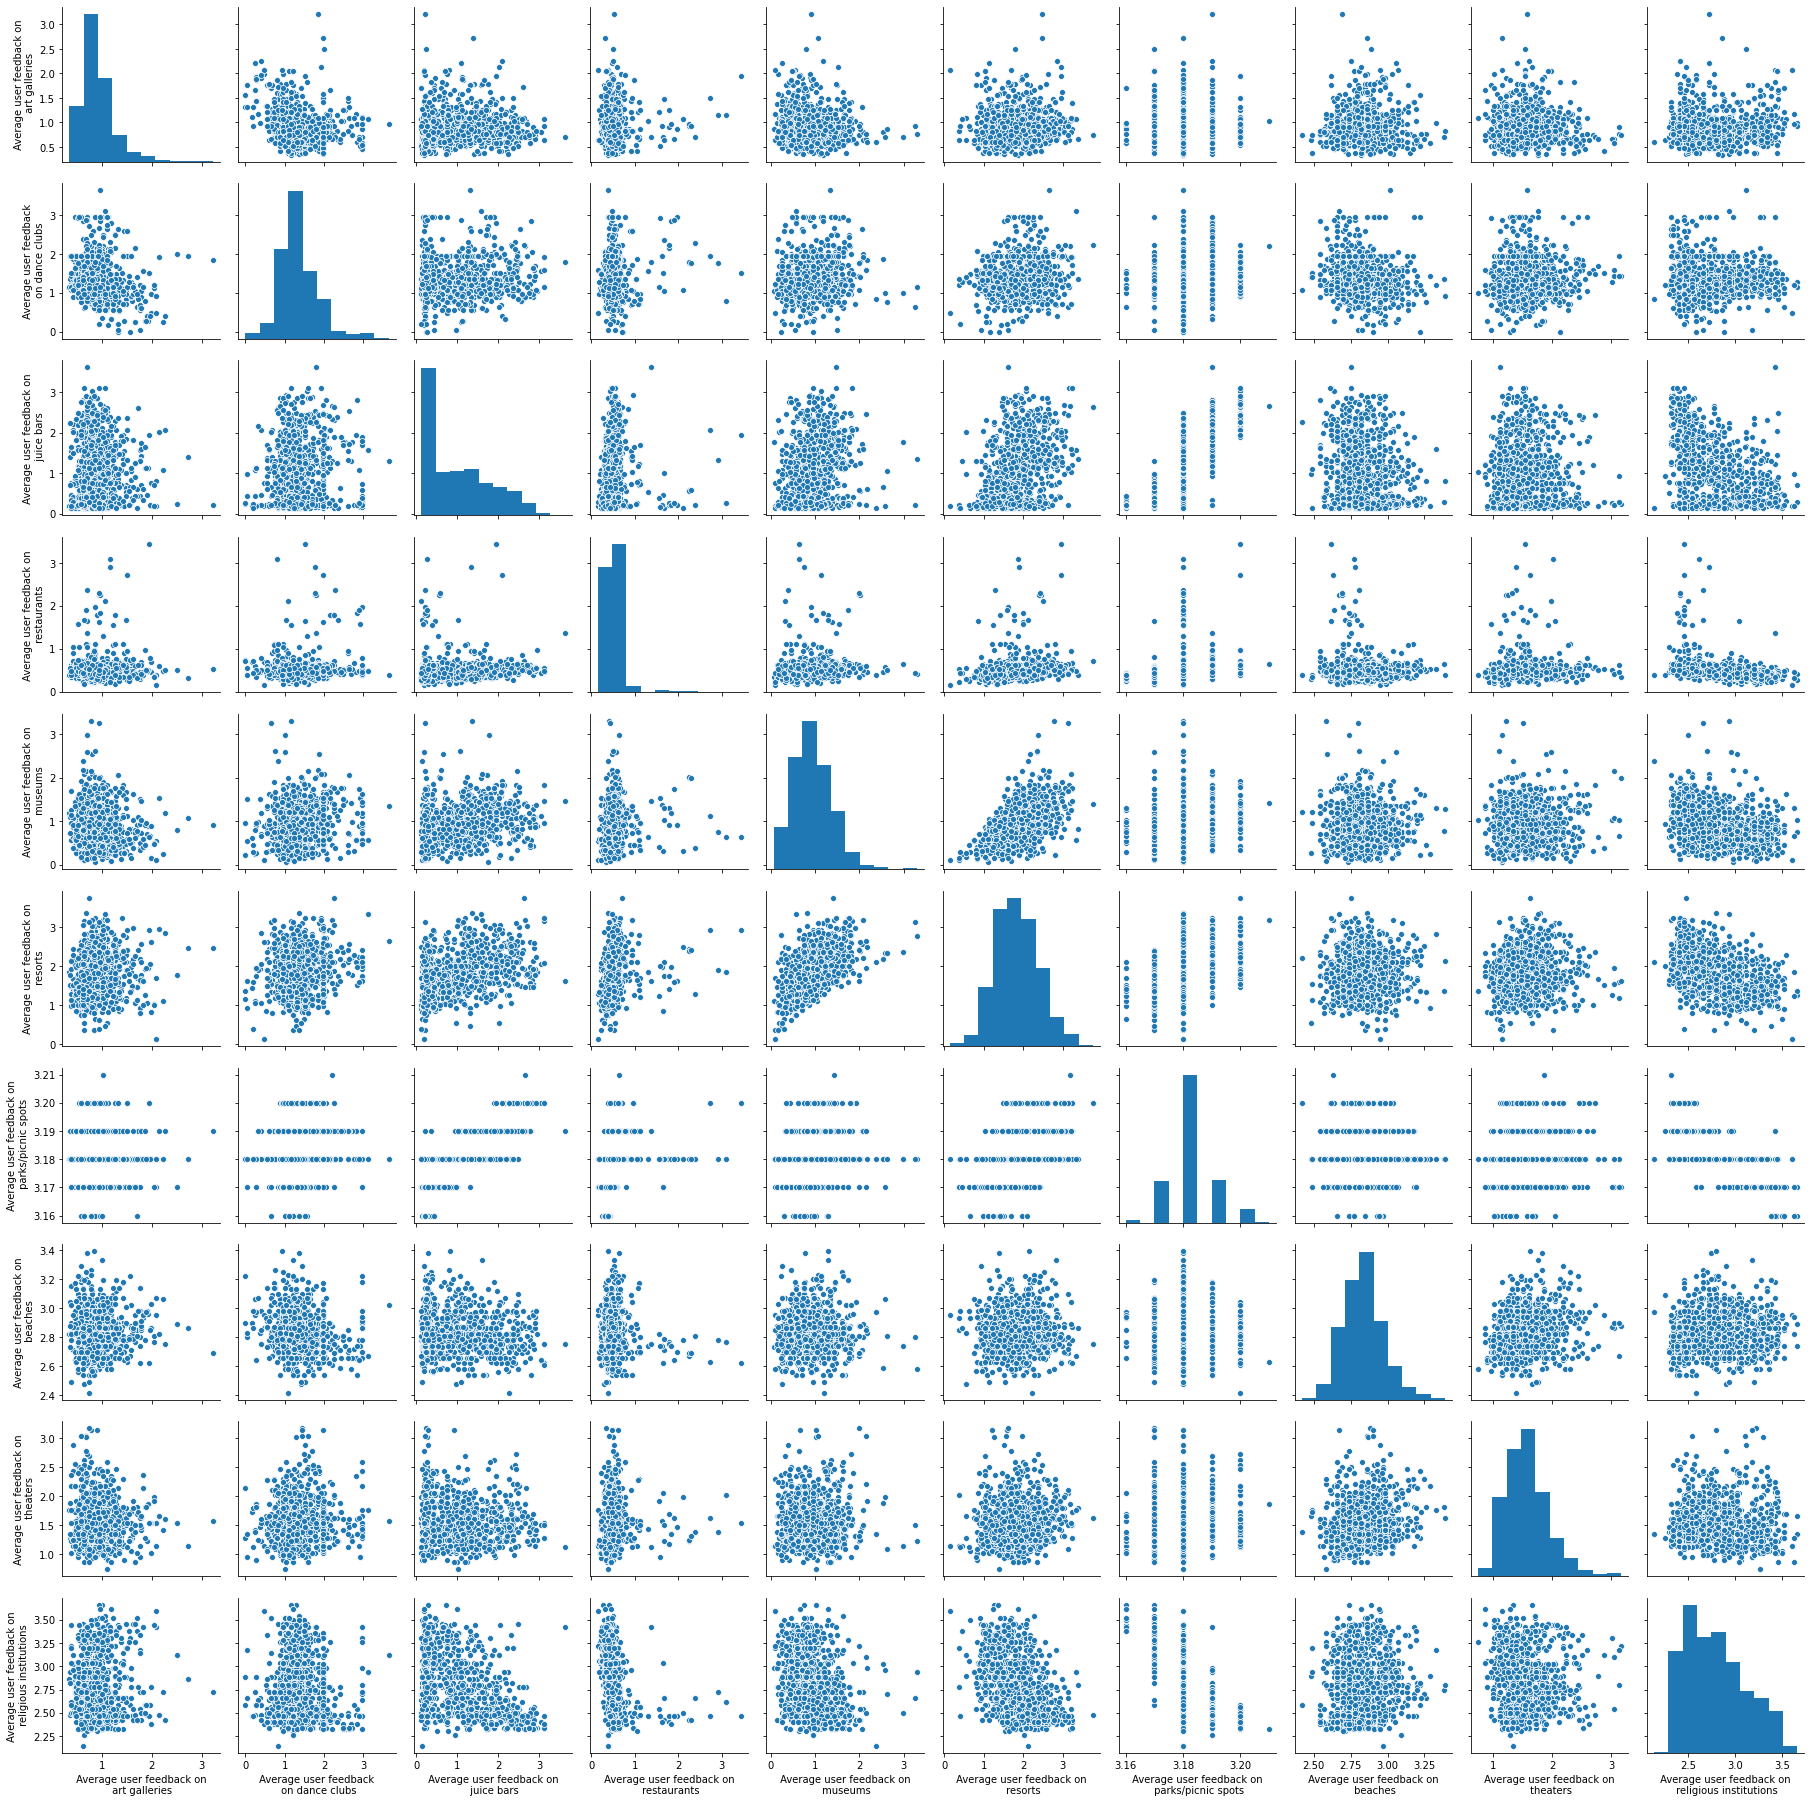

In [7]:
figout=sns.pairplot(df)
plt.savefig('figout.png')

# Clustering with K-means Algorithm (ie. Lloyd's Algorithm)

In [8]:
#Clustering the  data points into 3 clusters
kmeans=KMeans(n_clusters=3).fit(df[df.columns[1:len(df.columns)]])

In [9]:
#What are the cluster labels assigned?
df['predicted_cluster']=kmeans.labels_
df.head()

User ID  ...  predicted_cluster
0  User 1  ...                  1
1  User 2  ...                  1
2  User 3  ...                  0
3  User 4  ...                  0
4  User 5  ...                  2

[5 rows x 12 columns]

# The Elbow Method
- Is this data "clusterable?"
- What is the best number of clusters to ask for?

In [10]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


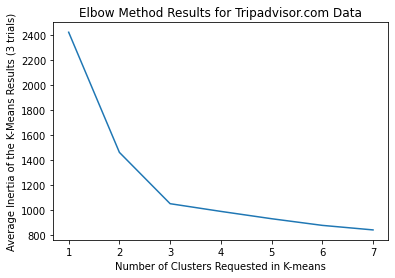

In [11]:
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Tripadvisor.com Data')
plt.show()

# Can we Determine Any Attributes (Characteristics from these 3 Clusters)?

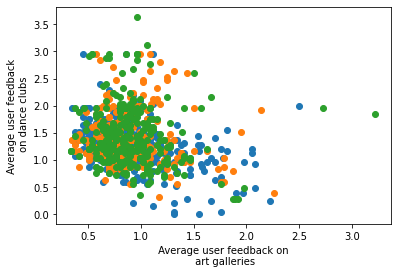

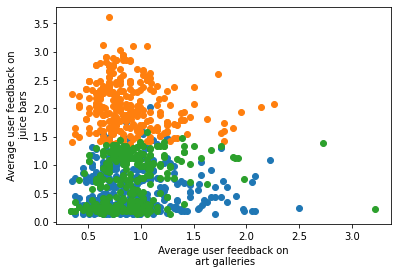

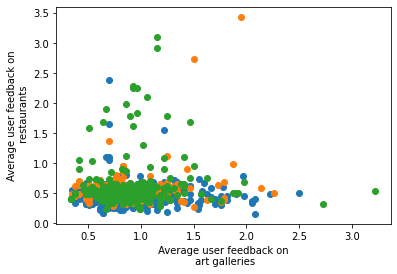

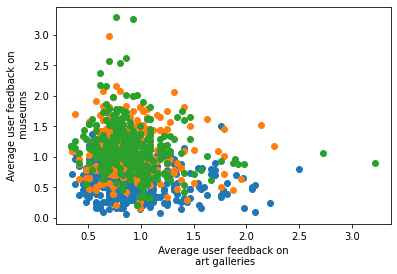

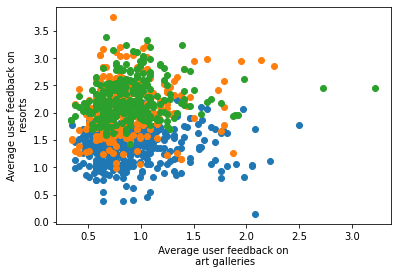

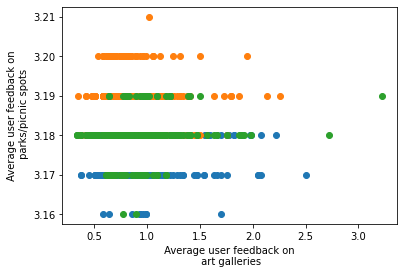

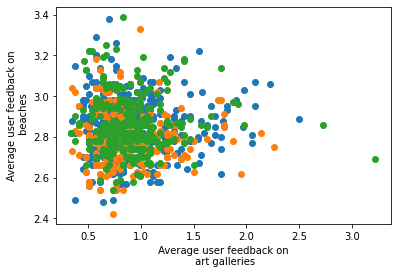

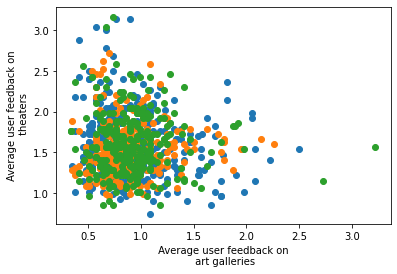

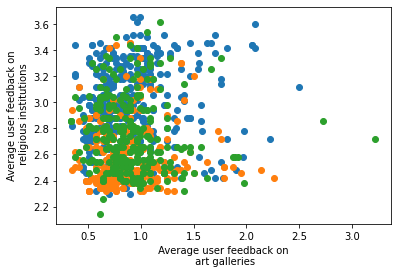

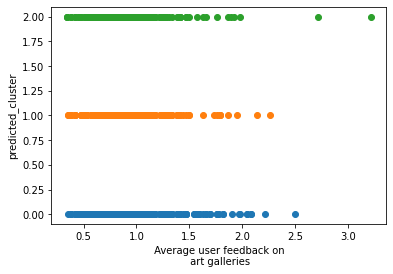

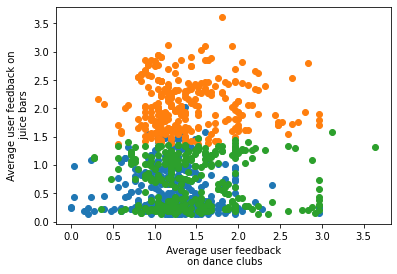

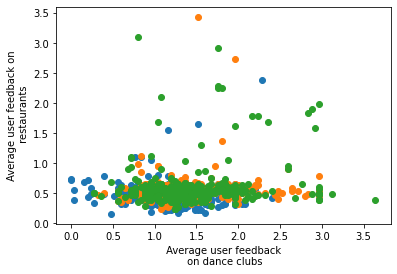

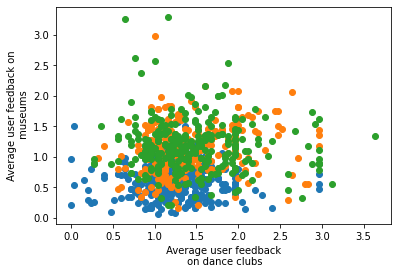

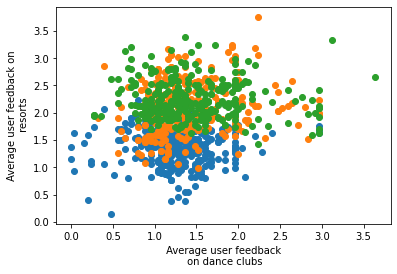

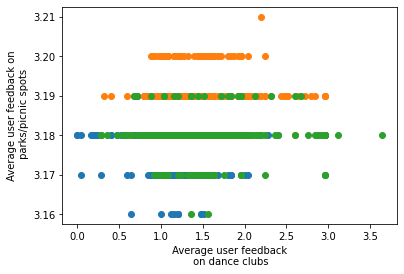

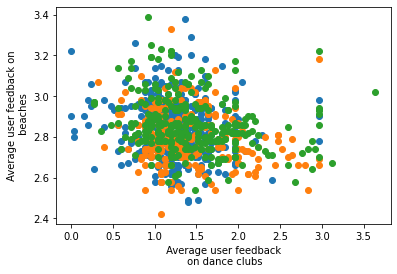

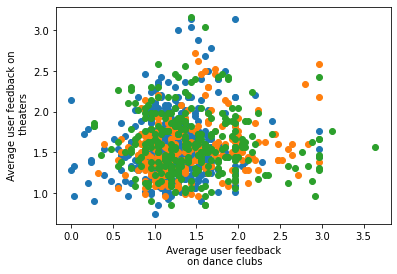

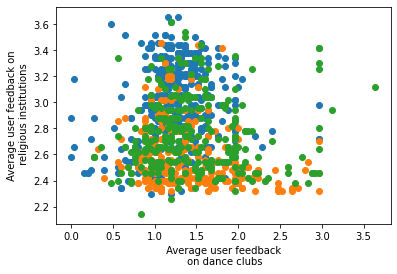

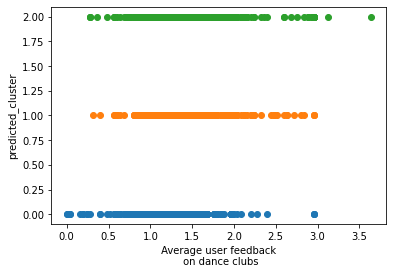

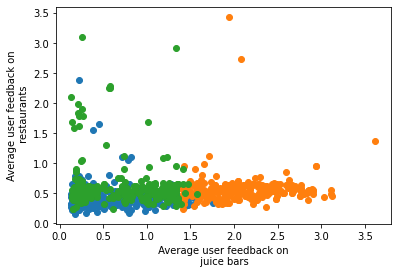

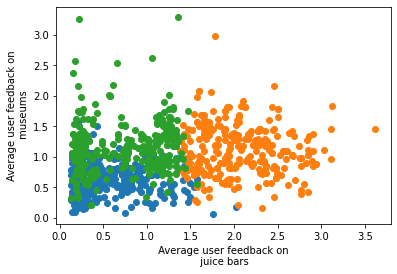

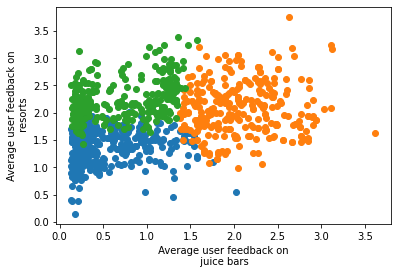

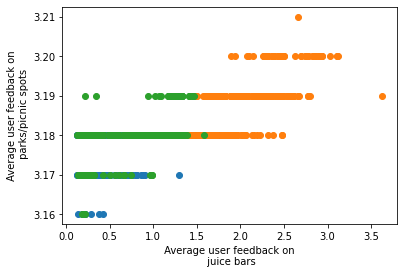

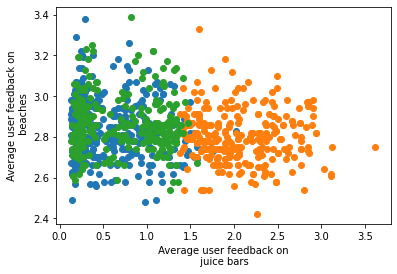

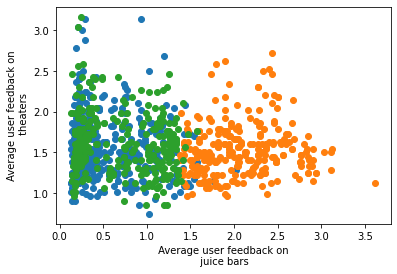

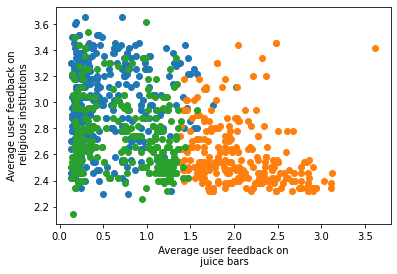

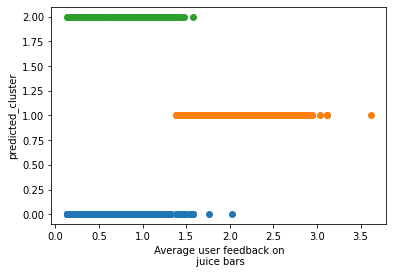

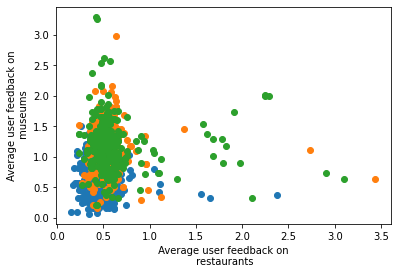

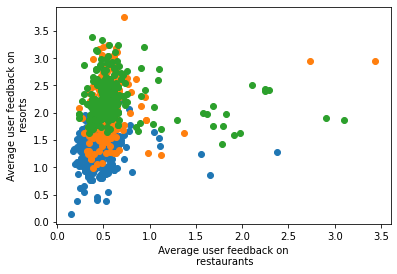

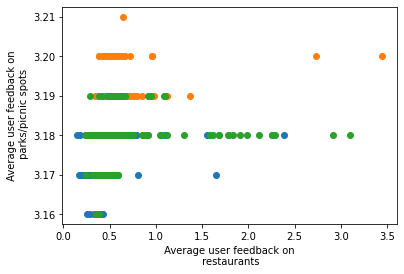

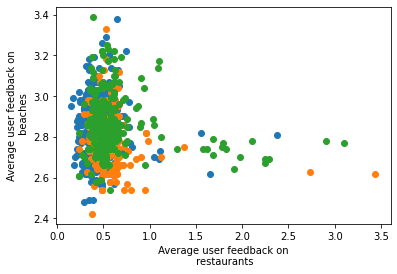

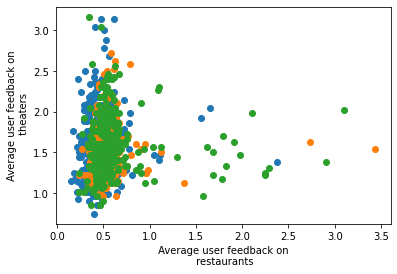

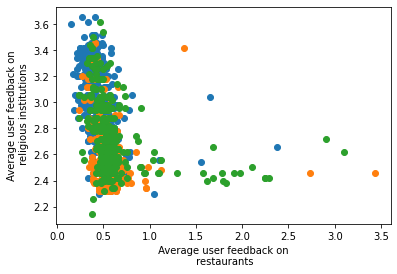

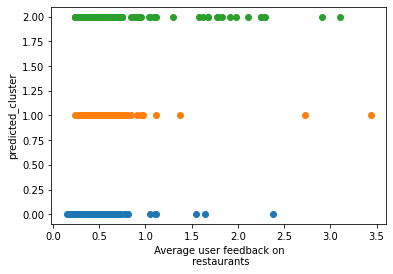

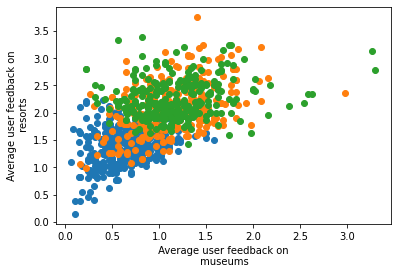

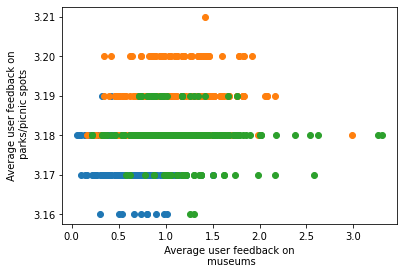

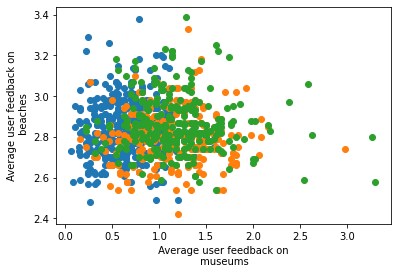

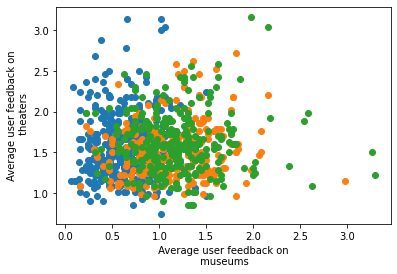

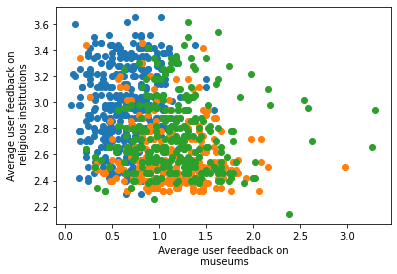

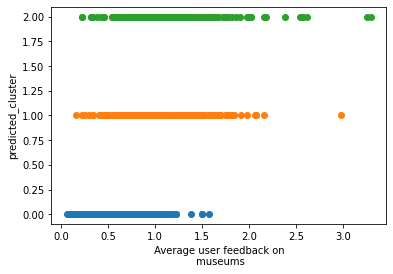

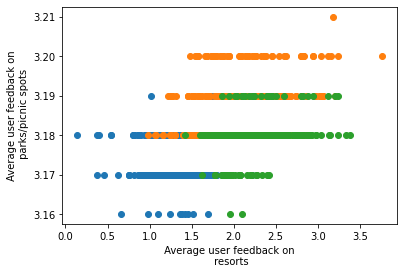

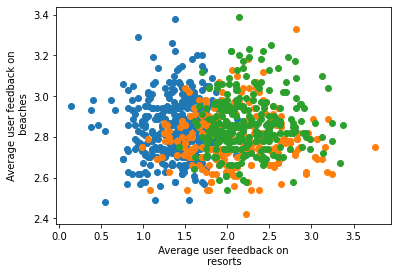

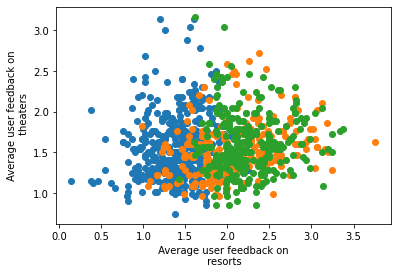

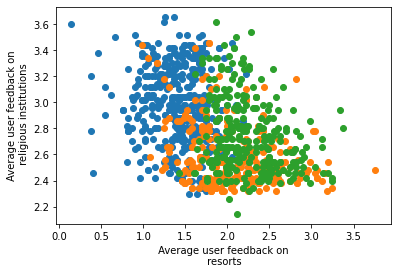

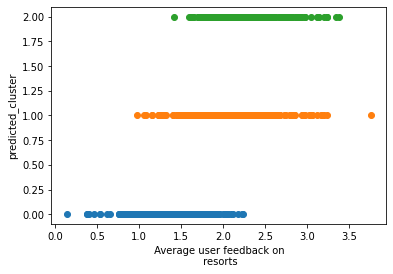

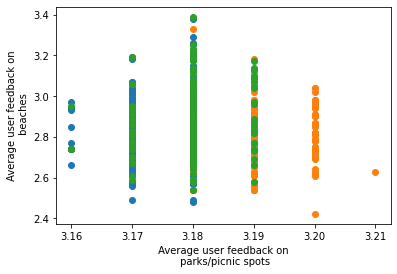

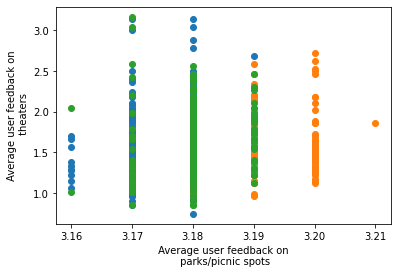

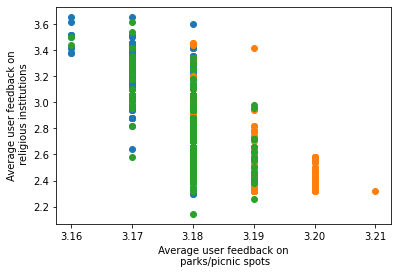

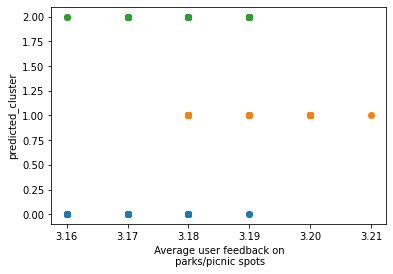

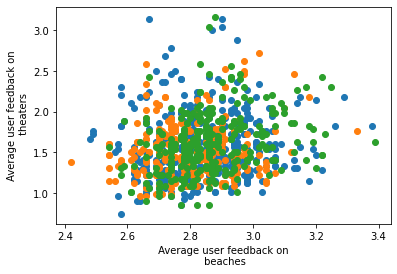

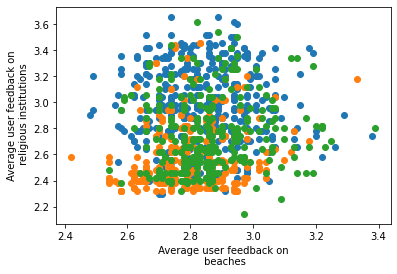

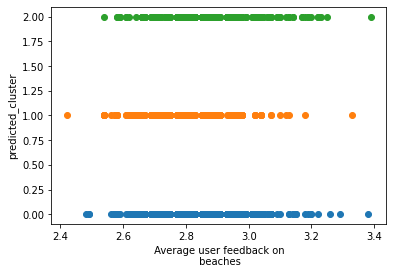

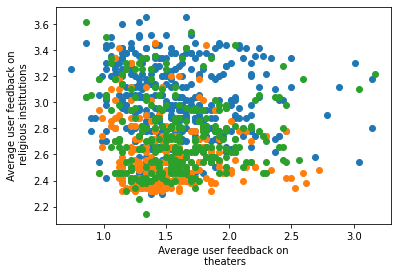

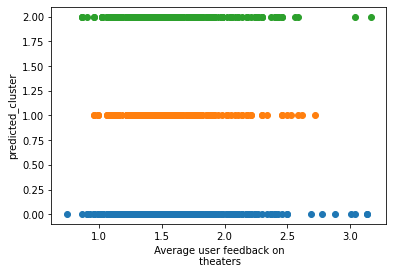

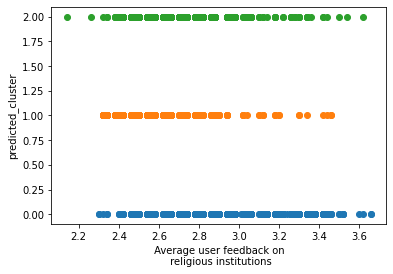

In [12]:
for i in range(1,len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        for k in range(0,3):
            plt.scatter(df[df.predicted_cluster==k][df.columns[i]], df[df.predicted_cluster==k][df.columns[j]])
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])
        plt.show()

In [13]:
df

User ID  ...  predicted_cluster
0      User 1  ...                  1
1      User 2  ...                  1
2      User 3  ...                  0
3      User 4  ...                  0
4      User 5  ...                  2
..        ...  ...                ...
975  User 976  ...                  0
976  User 977  ...                  0
977  User 978  ...                  2
978  User 979  ...                  0
979  User 980  ...                  2

[980 rows x 12 columns]

# What are some properties of k-means?

In [14]:
#Basic Packages Most Python Data Analysis will Require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#This allows us for our matplotlib plots to show up as cell output.
#(without this the plots we make may show up as windows that popout)
%matplotlib inline
print("Inline Functionality Set")
print('Basic Packages Loaded')

Inline Functionality Set
Basic Packages Loaded


In [15]:
#Common Descriptive Analytics Algorithms we will demonstrate in this class
from sklearn.cluster import KMeans
'Descriptive Analytics Algorithms Loaded'

'Descriptive Analytics Algorithms Loaded'

In [16]:
df_art=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/twenty.csv')
df_art.head()

x         y  actual_cluster
0  0.067391  0.648651               0
1  0.184058  0.285643               0
2  0.216653 -0.626459               0
3 -0.230196 -0.277555               0
4 -0.343994  0.952639               0

In [17]:
#How many 'actual' clusters are there?
df_art['actual_cluster'].drop_duplicates()

0       0
50      1
100     2
150     3
200     4
250     5
300     6
350     7
400     8
450     9
500    10
550    11
600    12
650    13
700    14
750    15
800    16
850    17
900    18
950    19
Name: actual_cluster, dtype: int64

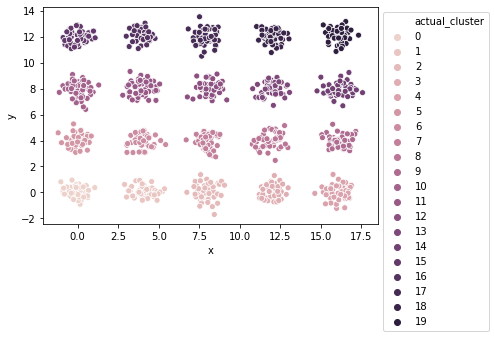

In [18]:
sns.scatterplot(x="x", y="y", hue='actual_cluster', data=df_art, legend='full')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

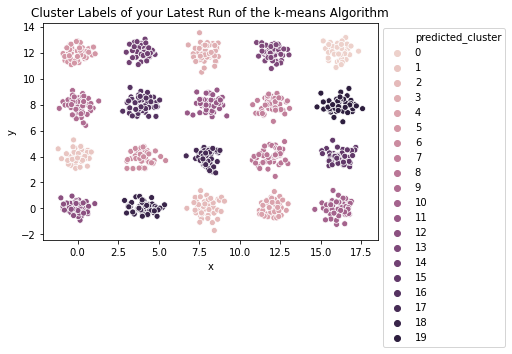

Inertia of your Latest Run of the k-means Algorithm
480.1865522892063


In [19]:
#Let's cluster the data using 20 clusters (is it realistic to assume that we would know ahead of time how, many cluster to ask for?)
X=df_art[['x','y']]
kmeans=KMeans(n_clusters=20).fit(X)
df_art['predicted_cluster']=kmeans.labels_

#What are the results? compare them to the people in your breakout rooms.
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df_art, legend='full')
plt.title('Cluster Labels of your Latest Run of the k-means Algorithm')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('Inertia of your Latest Run of the k-means Algorithm')
print(kmeans.inertia_)

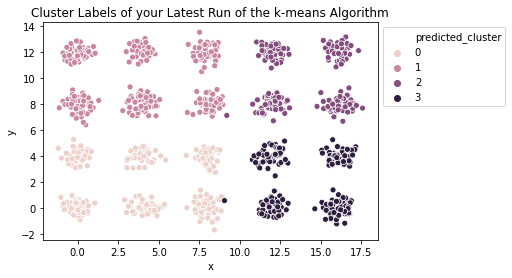

Inertia of your Latest Run of the k-means Algorithm
12496.41922983216


In [20]:
#Let's cluster the data using just 4 clusters
X=df_art[['x','y']]
kmeans=KMeans(n_clusters=4).fit(X)
df_art['predicted_cluster']=kmeans.labels_

#What are the results? compare them to the people in your breakout rooms.
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df_art, legend='full')
plt.title('Cluster Labels of your Latest Run of the k-means Algorithm')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('Inertia of your Latest Run of the k-means Algorithm')
print(kmeans.inertia_)